In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dt=pd.read_csv('Telecom Churn Customer.csv')

In [4]:
dt.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Droppinig customerID
dt.drop('customerID', axis=1, inplace=True)
dt.drop('TotalCharges', axis=1, inplace=True)

In [6]:
dt.shape

(7043, 19)

In [7]:
#encode categorical variables because the classifiers that will be used later on work on numerical  data 
dt=pd.get_dummies(dt, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],dummy_na=False,drop_first=True)


In [8]:
dt.head(5)

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [9]:
Target=dt['Churn_Yes']
Target.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn_Yes, dtype: uint8

In [10]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dt)
scaler_features = scaler.transform(dt)

# Apply PCA


In [11]:
from sklearn.decomposition import PCA
pca=PCA() #We want 95% of the variance to be retained ##this is the instance of the algorithm to use

In [12]:
principalComp=pca.fit_transform(dt)

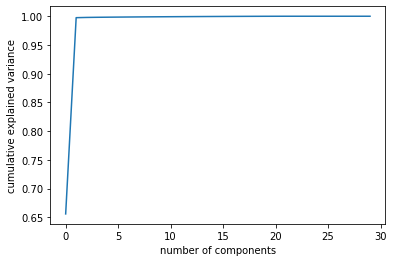

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Let's choose 3 components

In [14]:
dt_1=dt.drop('Churn_Yes', axis=1, inplace=True)
dt_1

In [15]:
dt_1=dt
dt=pd.concact([dt, Target], axis=1, ignore_index=True, sort=False)

AttributeError: module 'pandas' has no attribute 'concact'

In [16]:

pca=PCA(n_components=2)
pca.fit(dt_1)
principalComp=pca.transform(dt_1)
newdt = pd.DataFrame(data = principalComp,columns = ['principal component 1', 'principal component 2'] )

In [17]:
print(pca.explained_variance_ratio_)

[0.65595094 0.34166448]


**Quick visualisation after applying PCA of class in green: Churn_No and class in red Churn_Yes**

<Figure size 432x288 with 0 Axes>

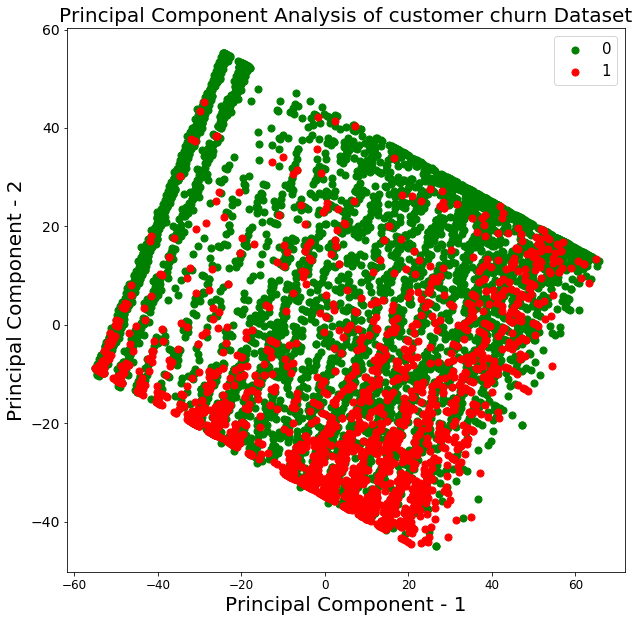

In [18]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of customer churn Dataset",fontsize=20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = Target == target
    plt.scatter(newdt.loc[indicesToKeep, 'principal component 1']
               , newdt.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [19]:
print (pd.DataFrame(pca.components_,columns=dt.columns,index = ['PC-1','PC-2']))

      SeniorCitizen    tenure  MonthlyCharges  gender_Male  Partner_Yes  \
PC-1       0.002292  0.425663        0.904221    -0.000173     0.003327   
PC-2      -0.001751  0.904629       -0.425299     0.000290     0.006960   

      Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
PC-1       -0.000661          0.002031                       -0.002031   
PC-2        0.004442         -0.001702                        0.001702   

      MultipleLines_Yes  InternetService_Fiber optic  ...  \
PC-1           0.008372                     0.010821  ...   
PC-2           0.001044                    -0.009263  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
PC-1                        -0.008806         0.009838   
PC-2                         0.007112        -0.001742   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
PC-1                            -0.008806             0.009859   
PC-2                             0.007112            -0.0015

In [20]:
y=Target
x=newdt


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[1425,  135],
       [ 336,  217]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
classify_knn = classification_report(y_test, y_pred_knn)
print(classify_knn)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1560
           1       0.62      0.39      0.48       553

    accuracy                           0.78      2113
   macro avg       0.71      0.65      0.67      2113
weighted avg       0.76      0.78      0.76      2113



# Imbalanced data

In [25]:
target_count=Target.value_counts()

Churn_No 5174
Churn_Yes 1869
Proportion: 26.54 : 1


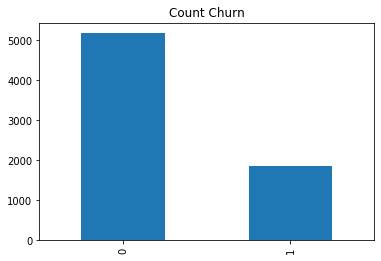

In [26]:
print('Churn_No', target_count[0])
print('Churn_Yes', target_count[1])
print('Proportion:', round((target_count[1] / target_count.sum())*100, 2), ': 1')

target_count.plot(kind='bar', title='Count Churn')

## Apply Smote and Tomek method: Oversampling and Undersampling

In [27]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

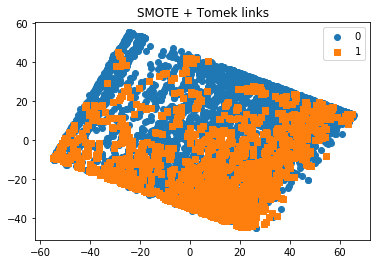

In [28]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(x, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [29]:
knn.fit(X_smt, y_smt)
y_pred_knn = knn.predict(X_test)

In [30]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[1223,  337],
       [ 119,  434]], dtype=int64)

In [31]:
classify_knn = classification_report(y_test, y_pred_knn)
print(classify_knn)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1560
           1       0.56      0.78      0.66       553

    accuracy                           0.78      2113
   macro avg       0.74      0.78      0.75      2113
weighted avg       0.82      0.78      0.79      2113



## Bagging, Boostrapping

In [32]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(knn)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7714150496923805

In [33]:
model.fit(x, y)
model.score(X_test,y_test)

0.8059630856601988

In [36]:
model.score(X_train,y_train)

0.8158215010141988

In [37]:
predictions=model.predict(X_test)

In [38]:
confusion_matrix_bagging=confusion_matrix(y_test, predictions)
confusion_matrix_bagging

array([[1424,  136],
       [ 274,  279]], dtype=int64)

In [39]:
classify_bagging = classification_report(y_test, predictions)
print(classify_bagging)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1560
           1       0.67      0.50      0.58       553

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



### Based on the results above, it seems that the unbalanced dataset problem is not the only problem affecting the performance of prediction. The models used seperately tend to overfit the data. So we try the ensemble learning for better performance

In [40]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7832465688594415

In [41]:
model.score(X_train, y_train)

0.7908722109533468

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7823000473260767

In [44]:
model.score(X_train,y_train)

0.7908722109533468

In [45]:
from imblearn.ensemble import EasyEnsemble
easy_ensemble = EasyEnsemble(random_state=42)
X_res, y_res = easy_ensemble.fit_sample(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class EasyEnsemble is deprecated; EasyEnsemble is deprecated in 0.4 and will be removed in 0.6. Use EasyEnsembleClassifier instead.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
X_train.shape

(4930, 2)

In [47]:
from collections import Counter
print('Resampled dataset shape {}'.format(Counter(y_res[0])))
#Resampled dataset shape Counter({0: 100, 1: 100})

Resampled dataset shape Counter({0: 1316, 1: 1316})


In [46]:
knn.fit(X_res, y_res)

ValueError: Found array with dim 3. Estimator expected <= 2.